# 1. Rule Based

In [1]:
grammar = """
sentence= adj noun adv verb noun2
adj= adj_single auxj
adj_single= 漂亮|好看|蓝色
auxj= 的
adv= adv_single auxv
adv_single= 安静|淡定
auxv= 地
verb= 看着|坐着
noun=猫|狗
noun2= 桌子|皮球
"""

In [2]:

def build_grammar(grammar_str,split="="):
    grammar_pattern={}
    for line in grammar_str.split("\n"):
        print(line, not line)
#         None, False,空字符串"", 0, 空列表[], 空字典{}, 空元组()都相当于False
        if not line: continue
        stmt,exp=line.split(split)
        grammar_pattern[stmt]=[e.split() for e in exp.split("|")]
    return grammar_pattern

In [3]:
gp=build_grammar(grammar)

 True
sentence= adj noun adv verb noun2 False
adj= adj_single auxj False
adj_single= 漂亮|好看|蓝色 False
auxj= 的 False
adv= adv_single auxv False
adv_single= 安静|淡定 False
auxv= 地 False
verb= 看着|坐着 False
noun=猫|狗 False
noun2= 桌子|皮球 False
 True


In [4]:
import random
def generate(grammar_pattern,target):
    if target not in grammar_pattern:
        return target
    else:
        exp=random.choice(grammar_pattern[target])
        tokens=[generate(grammar_pattern,e) for e in exp]
    return ''.join([t for t in tokens])

In [5]:
generate(gp,"sentence")

'漂亮的猫淡定地坐着皮球'

# 2. Search Based

## 2.1 BFS

In [17]:

D1='1'
D2='2'
D3='3'
D4='4'
D5='5'
D6='6'
D7='7'
D8='8'
D9='9'
D10='10'
D11='11'
D12='12'

graph={
    D1: {D2,D7},
    D2: {D3}, 
#     D3: {D4}, 
    D3: {D2,D4},
#     D4: {D5,D10}, 
    D4: {D3,D5,D10},
    D5: {D6}, 
    D6: {D5},
    D7: {D8},
#     D8: {D9}
    D8: {D7,D9},
#     D9: {D10}
    D9: {D8,D10}, 
#     D10:{D4,D11}
    D10:{D4,D9,D11}, 
    D11:{D12},
    D12:{D11}
}


In [7]:
%matplotlib inline

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


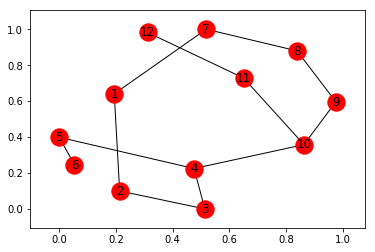

In [8]:
import networkx as nx
graph_plot=nx.Graph(graph)
nx.draw_networkx(graph_plot,arrows=True,with_Labels=True)

In [9]:
def search_bfs(graph):
    visited=set()
    to_visit=[D1]
    while to_visit:
        tmp=to_visit.pop(0)
        if tmp in visited: 
            print("{} is visited".format(tmp))
            continue
        else:
            print("visiting:{}".format(tmp))
            visited.add(tmp)
            to_visit+=graph[tmp]

In [10]:
search_bfs(graph)

visiting:1
visiting:2
visiting:7
visiting:3
visiting:8
visiting:4
visiting:9
visiting:10
visiting:5
10 is visited
visiting:11
4 is visited
visiting:6
visiting:12
5 is visited
11 is visited


## 2.2 DFS

In [11]:
def search_bfs(graph):
    visited=set()
    to_visit=[D1]
    while to_visit:
        tmp=to_visit.pop(0)
        if tmp in visited:
            print("{} is visited".format(tmp))
            continue
        else:
            print("visiting:{}".format(tmp))
            visited.add(tmp)
            to_visit=list(graph[tmp])+to_visit

In [12]:
search_bfs(graph)
# uni-direction

visiting:1
visiting:2
visiting:3
visiting:4
visiting:10
visiting:11
visiting:12
11 is visited
4 is visited
visiting:5
visiting:6
5 is visited
visiting:7
visiting:8
visiting:9
10 is visited


In [18]:
search_bfs(graph)
# bi-direction

visiting:1
visiting:2
visiting:3
2 is visited
visiting:4
3 is visited
visiting:10
visiting:9
visiting:8
9 is visited
visiting:7
8 is visited
10 is visited
visiting:11
visiting:12
11 is visited
4 is visited
visiting:5
visiting:6
5 is visited
7 is visited


## 2.3 Mapping

In [19]:
PEK='beijing'
PVG='shanghai'
CSX='changsha'
XMN='xiamen'

TAO='qingdao'
HAK='haikou'
SYD='sydney'

In [20]:
import matplotlib.pyplot as plt
import networkx as nx
G=nx.Graph()

In [21]:
G.add_edge(PEK,SYD)
G.add_edge(PEK,PVG)
G.add_edge(PVG,SYD)
G.add_edge(PEK,TAO)
G.add_edge(TAO,PVG)
G.add_edge(PEK,HAK)
G.add_edge(PEK,CSX)
G.add_edge(CSX,XMN)
G.add_edge(XMN,SYD)

C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


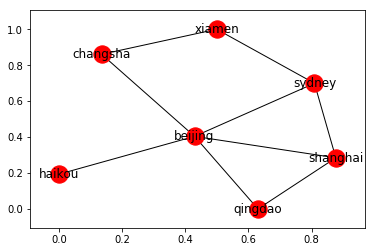

In [22]:
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos,with_Labels=True)
plt.show()

In [23]:
def search_route(graph,start,destination):
    routes=[[start]]
    visited=set()
    visited.add(destination)
    output=[]
    while routes:
        route=routes.pop(0)
        last_stop=route[-1]
        if last_stop==destination:
            output.append(route)
        if last_stop in visited:
            continue    
        else:
            cities=nx.neighbors(G,last_stop)
            for city in cities:
             
                new_route=route+[city]
                routes.append(new_route)

        visited.add(last_stop)


    return output


In [24]:
search_route(G,PEK,SYD)

[['beijing', 'sydney'],
 ['beijing', 'shanghai', 'sydney'],
 ['beijing', 'changsha', 'xiamen', 'sydney']]